In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-1**<br>
**Profesora:** Paula Aguirre <br>

## Clase 9: Limpieza de Datos

---

## 1. Limpieza de Datos.

El set de datos que utilizaremos en este ejercicio proviene de la página `insideairbnb.com`, un grupo de lobby anti-Airbnb que hace scraping de las propiedades publicadas en distintas ciudades del mundo, para estudiar el impacto que esta plataforma tiene sobre los barrios y el desarrollo urbano. En este caso, procesaremos el dataset de propiedades disponibles en Santiago de Chile (actualizado a abril de 2019):

http://insideairbnb.com/index.html

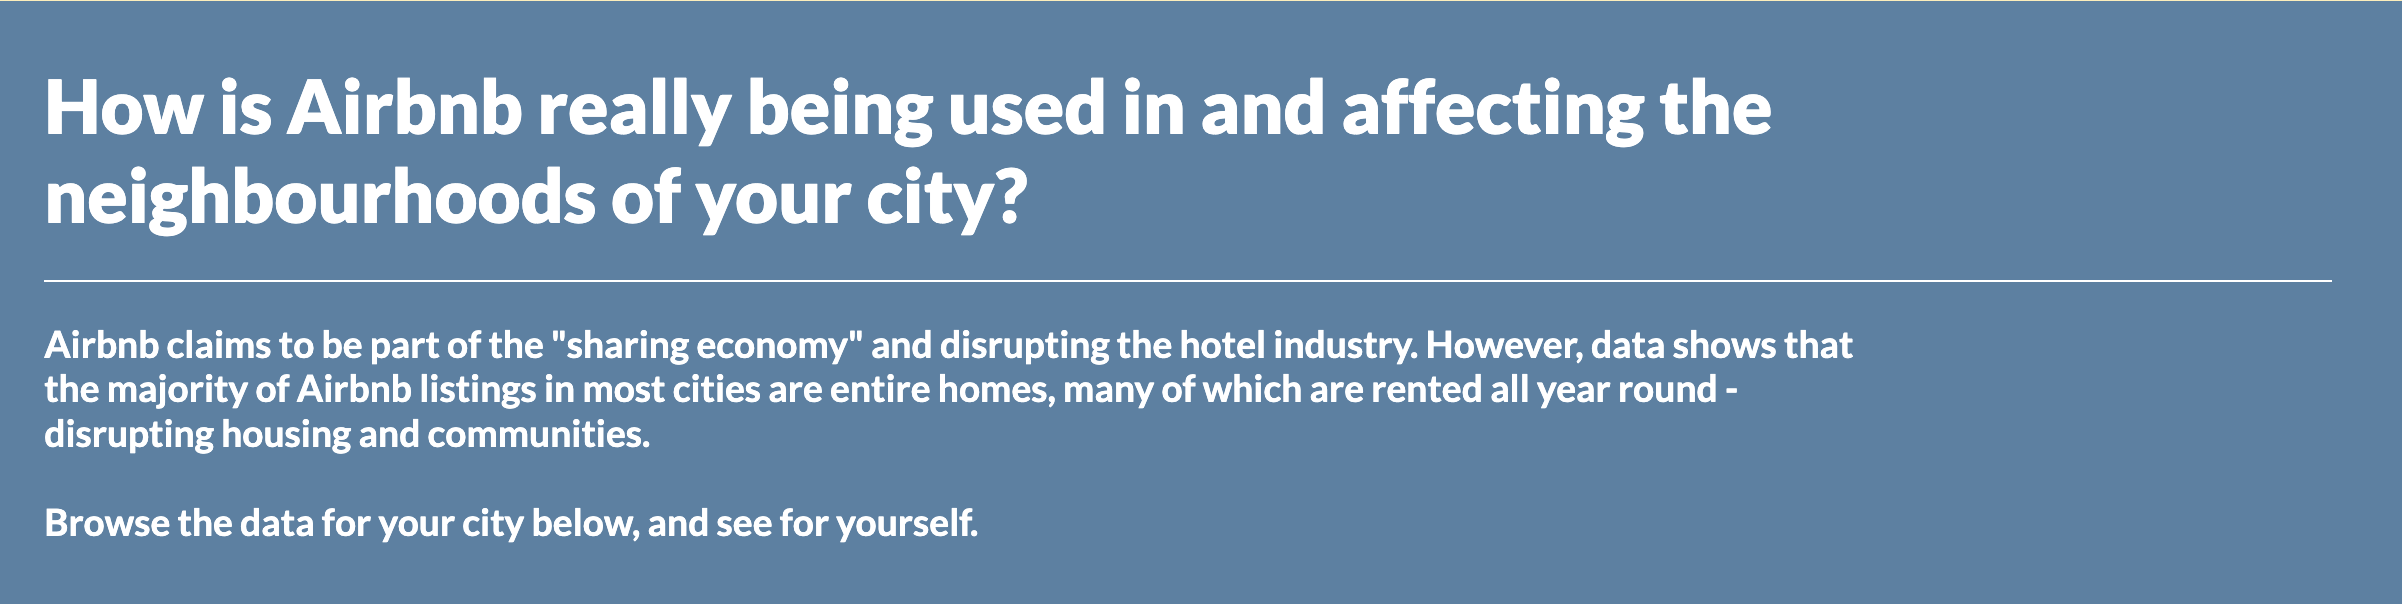



In [3]:
#lectura de datos
import pandas as pd
df0=pd.read_csv('listings.csv')
df0.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14576,https://www.airbnb.com/rooms/14576,20200621051637,2020-06-22,Dp Valen Castillo 1600,NaN,Nice Flat in 11th floor in front of Mountains ...,Nice Flat in 11th floor in front of Mountains ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,NaN
1,30950,https://www.airbnb.com/rooms/30950,20200621051637,2020-06-22,"Apartment Providencia, Santiago","Located in the heart of Providencia, near by r...",Location: Manuel Montt Av. close to the corner...,"Located in the heart of Providencia, near by r...",none,"Quiet and typical beatiful neighborghood, a lo...",...,t,f,flexible,f,f,1,1,0,0,0.11
2,47936,https://www.airbnb.com/rooms/47936,20200621051637,2020-06-22,My Flat in English,NaN,Nice and comfortable! (Website hidden by Airbnb),Nice and comfortable! (Website hidden by Airbnb),none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
3,49392,https://www.airbnb.com/rooms/49392,20200621051637,2020-06-22,Share my Flat in Providencia,NaN,Departamento en el barrio Providencia. Complet...,Departamento en el barrio Providencia. Complet...,none,NaN,...,t,f,moderate,f,f,3,1,2,0,NaN
4,50466,https://www.airbnb.com/rooms/50466,20200621051637,2020-06-21,Great apartment at a great location,NaN,Fully furnished LCD TV Wi-fi internet access A...,Fully furnished LCD TV Wi-fi internet access A...,none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN


In [9]:
df0.sample(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1940,9126209,https://www.airbnb.com/rooms/9126209,20200621051637,2020-06-25,Tucapel Great Location in Downtown Piso 12,This apartment is located at walking distance ...,The apartment is really comfy with brand new f...,This apartment is located at walking distance ...,none,This neighborhood is very quiet and safe. It i...,...,t,f,moderate,f,f,6,6,0,0,0.18
726,4508617,https://www.airbnb.com/rooms/4508617,20200621051637,2020-06-21,Estudio 22m2 barrio Lastarria,Excelente estudio muy bien amoblado y equipado...,Ubicación notable para estudiantes o turistas ...,Excelente estudio muy bien amoblado y equipado...,none,"Absolutamente equipado de servicios, transport...",...,f,f,flexible,f,f,1,1,0,0,0.03
4079,16387044,https://www.airbnb.com/rooms/16387044,20200621051637,2020-06-21,Modern apartment in downtown Santiago,Modern style apartment convientenly located in...,Las mejores conexiones de transporte publico a...,Modern style apartment convientenly located in...,none,El barrio Bulnes es una gran avenida peatonal ...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.50
4038,16290358,https://www.airbnb.com/rooms/16290358,20200621051637,2020-06-21,Nice Apartment in Bellas Artes,Disfruta de una privilegiada ubicación en un a...,NaN,Disfruta de una privilegiada ubicación en un a...,none,NaN,...,t,f,flexible,f,f,1,1,0,0,0.14
13789,39922751,https://www.airbnb.com/rooms/39922751,20200621051637,2020-06-22,Depto. Interior independiente en borde de par...,Este espacio es completamente independiente y ...,El lugar está ubicado en el patio que colinda ...,Este espacio es completamente independiente y ...,none,Es de muy buen acceso en general a todo. Resta...,...,f,f,strict_14_with_grace_period,f,f,3,1,2,0,0.34
7253,23376775,https://www.airbnb.com/rooms/23376775,20200621051637,2020-06-21,Arriendo depto para 3 personas en Santiago Centro,Se arrienda increíble departamento en el centr...,NaN,Se arrienda increíble departamento en el centr...,none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN
14170,40643152,https://www.airbnb.com/rooms/40643152,20200621051637,2020-06-22,"Gran habitación single, servicios opcionales","En hermosa casa con jardín, terraza, parrilla,...","En una casa de familia grande, acostumbrada a ...","En hermosa casa con jardín, terraza, parrilla,...",none,"En este barrio, resuelves tus necesidades y te...",...,t,f,flexible,f,f,6,1,5,0,0.37
10361,31465912,https://www.airbnb.com/rooms/31465912,20200621051637,2020-06-23,Depa con gran vista y estilo,"Departamento con estilo hippie chic, iluminado...","En mi departamento viven mis 2 perros, Clo y A...","Departamento con estilo hippie chic, iluminado...",none,En mi barrio esta Mosai Café que es un local c...,...,t,f,flexible,f,f,1,0,1,0,NaN
10376,31492707,https://www.airbnb.com/rooms/31492707,20200621051637,2020-06-21,Acogedor y luminoso Depto,"Lindo y luminoso Depto en el piso 13 , con vis...","El Depto tiene 100% equipada su cocina , el ba...","Lindo y luminoso Depto en el piso 13 , con vis...",none,"Parque, iglesia,supermercado,se puede ir camin...",...,f,f,flexible,f,f,3,2,1,0,0.07
725,4498608,https://www.airbnb.com/rooms/4498608,20200621051637,2020-06-21,Apartamento centro de la ciudad,Lindo departamento en pleno centro de la ciuda...,NaN,Lindo departamento en pleno centro de la ciuda...,none,NaN,...,t,f,flexible,f,f,1,0,1,0,0.17


## 1.1 Eliminación y cambio de nombre de columnas.

In [11]:
df0.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [13]:
keep_cols=['id','listing_url','name','summary','host_id','host_is_superhost','city','state','country','country_code','latitude','longitude','accommodates','bathrooms','bedrooms','square_feet','price','cleaning_fee','number_of_reviews']
df=df0[keep_cols]
df.head(10)

,id,listing_url,name,summary,host_id,host_is_superhost,city,state,country,country_code,latitude,longitude,accommodates,bathrooms,bedrooms,square_feet,price,cleaning_fee,number_of_reviews
0,14576,https://www.airbnb.com/rooms/14576,Dp Valen Castillo 1600,NaN,14972,f,Santiago,Chile,Chile,CL,-33.46413,-70.64869,3,NaN,NaN,NaN,"$81,730.00",NaN,0
1,30950,https://www.airbnb.com/rooms/30950,"Apartment Providencia, Santiago","Located in the heart of Providencia, near by r...",132845,f,Santiago,Región Metropolitana,Chile,CL,-33.43174,-70.61845,2,1.0,1.0,NaN,"$19,615.00","$60,000.00",4
2,47936,https://www.airbnb.com/rooms/47936,My Flat in English,NaN,218471,f,Santiago,Región Metropolitana,Chile,CL,-33.44791,-70.63547,1,NaN,1.0,NaN,"$44,952.00",NaN,0
3,49392,https://www.airbnb.com/rooms/49392,Share my Flat in Providencia,NaN,224592,f,Santiago,Región Metropolitana,Chile,CL,-33.43266,-70.60072,1,NaN,1.0,NaN,"$44,952.00","$16,346.00",0
4,50466,https://www.airbnb.com/rooms/50466,Great apartment at a great location,NaN,231631,f,Santiago,Región Metropolitana,Chile,CL,-33.43630,-70.65390,2,NaN,1.0,NaN,"$69,471.00",NaN,0
5,52811,https://www.airbnb.com/rooms/52811,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,244792,f,Providencia,Región Metropolitana,Chile,CL,-33.42959,-70.61880,4,1.0,1.0,400.0,"$61,474.00","$32,786.00",45
6,53494,https://www.airbnb.com/rooms/53494,depto centro ski el colorado chile,NaN,249097,f,Santiago,Región Metropolitana,Chile,CL,-33.34344,-70.29432,8,2.0,2.0,753.0,"$150,023.00",NaN,37
7,53917,https://www.airbnb.com/rooms/53917,Estudio un ambiente Metro Bellas Artes,"Estudio de un ambiente, edificio con seguridad...",252213,f,Santiago,Región Metropolitana,Chile,CL,-33.43524,-70.64544,3,1.0,1.0,NaN,"$34,327.00",NaN,8
8,55303,https://www.airbnb.com/rooms/55303,Departamento Amoblado en Santiago,NaN,261079,f,Santiago,Región Metropolitana,Chile,CL,-33.42329,-70.60886,5,2.0,2.0,NaN,"$89,903.00",NaN,2
9,55606,https://www.airbnb.com/rooms/55606,internet wi fi,NaN,262785,f,Santiago,Región Metropolitana,Chile,CL,-33.43880,-70.60971,1,NaN,1.0,NaN,"$65,572.00",NaN,0


In [15]:
#df.drop(columns=['country_code'],inplace=True)
df=df.drop(columns=['country_code'])
df.head()

,id,listing_url,name,summary,host_id,host_is_superhost,city,state,country,latitude,longitude,accommodates,bathrooms,bedrooms,square_feet,price,cleaning_fee,number_of_reviews
0,14576,https://www.airbnb.com/rooms/14576,Dp Valen Castillo 1600,NaN,14972,f,Santiago,Chile,Chile,-33.46413,-70.64869,3,NaN,NaN,NaN,"$81,730.00",NaN,0
1,30950,https://www.airbnb.com/rooms/30950,"Apartment Providencia, Santiago","Located in the heart of Providencia, near by r...",132845,f,Santiago,Región Metropolitana,Chile,-33.43174,-70.61845,2,1.0,1.0,NaN,"$19,615.00","$60,000.00",4
2,47936,https://www.airbnb.com/rooms/47936,My Flat in English,NaN,218471,f,Santiago,Región Metropolitana,Chile,-33.44791,-70.63547,1,NaN,1.0,NaN,"$44,952.00",NaN,0
3,49392,https://www.airbnb.com/rooms/49392,Share my Flat in Providencia,NaN,224592,f,Santiago,Región Metropolitana,Chile,-33.43266,-70.60072,1,NaN,1.0,NaN,"$44,952.00","$16,346.00",0
4,50466,https://www.airbnb.com/rooms/50466,Great apartment at a great location,NaN,231631,f,Santiago,Región Metropolitana,Chile,-33.43630,-70.65390,2,NaN,1.0,NaN,"$69,471.00",NaN,0


In [18]:
df=df.rename(columns={'price':'price_CLP'})

In [17]:
df

,id,listing_url,name,summary,host_id,host_is_superhost,city,state,country,latitude,longitude,accommodates,bathrooms,bedrooms,square_feet,price,cleaning_fee,number_of_reviews
0,14576,https://www.airbnb.com/rooms/14576,Dp Valen Castillo 1600,NaN,14972,f,Santiago,Chile,Chile,-33.46413,-70.64869,3,NaN,NaN,NaN,"$81,730.00",NaN,0
1,30950,https://www.airbnb.com/rooms/30950,"Apartment Providencia, Santiago","Located in the heart of Providencia, near by r...",132845,f,Santiago,Región Metropolitana,Chile,-33.43174,-70.61845,2,1.0,1.0,NaN,"$19,615.00","$60,000.00",4
2,47936,https://www.airbnb.com/rooms/47936,My Flat in English,NaN,218471,f,Santiago,Región Metropolitana,Chile,-33.44791,-70.63547,1,NaN,1.0,NaN,"$44,952.00",NaN,0
3,49392,https://www.airbnb.com/rooms/49392,Share my Flat in Providencia,NaN,224592,f,Santiago,Región Metropolitana,Chile,-33.43266,-70.60072,1,NaN,1.0,NaN,"$44,952.00","$16,346.00",0
4,50466,https://www.airbnb.com/rooms/50466,Great apartment at a great location,NaN,231631,f,Santiago,Región Metropolitana,Chile,-33.43630,-70.65390,2,NaN,1.0,NaN,"$69,471.00",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15979,43860335,https://www.airbnb.com/rooms/43860335,Apartamento en alquiler diario,NaN,349924900,f,Providencia,Región Metropolitana,Chile,-33.43376,-70.64090,3,1.0,1.0,NaN,"$30,240.00",NaN,0
15980,43861654,https://www.airbnb.com/rooms/43861654,Arriendo pieza individual amoblada,"Departamento antiguo en Barrio Bellas Artes, c...",61325117,f,Santiago,Región Metropolitana,Chile,-33.43381,-70.64589,1,1.5,1.0,NaN,"$11,442.00",NaN,0
15981,43861702,https://www.airbnb.com/rooms/43861702,Casa compartida,NaN,84779653,f,Las Condes,Región Metropolitana,Chile,-33.41197,-70.54748,4,1.0,2.0,NaN,"$22,014.00",NaN,0
15982,43861718,https://www.airbnb.com/rooms/43861718,Plaza de Armas 742,Lindo departamento Ubicado en zona céntrica de...,284274946,f,Santiago,Región Metropolitana,Chile,-33.43916,-70.65093,4,1.0,0.0,NaN,"$34,327.00","$7,000.00",0


## 1.2 Tipos de datos

In [26]:
df['id'].dtypes

dtype('int64')

In [30]:
df['accommodates'].describe()

count    15984.000000
mean         2.733046
std          1.867404
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

In [31]:
df['accommodates']=df['accommodates'].astype('category')

In [32]:
df['accommodates'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], ordered=False)

In [33]:
df['accommodates'].describe()

count     15984
unique       16
top           2
freq       5678
Name: accommodates, dtype: int64

## 1.3 Datos duplicados.

In [40]:
duplicates=df.duplicated(keep=False)
df[duplicates]


,id,listing_url,name,summary,host_id,host_is_superhost,city,state,country,latitude,longitude,accommodates,bathrooms,bedrooms,square_feet,price_CLP,cleaning_fee,number_of_reviews
1078,6127272,https://www.airbnb.com/rooms/6127272,Habitación en Barrio Bellavista,El departamento es de 65 m2 y 2 habitaciones. ...,31788125,f,Santiago,Región Metropolitana de Santiago,Chile,-33.43247,-70.63605,1,1.0,1.0,NaN,"$13,894.00","$16,346.00",2
1079,6129888,https://www.airbnb.com/rooms/6129888,Privileged location in Santiago Centro 3PX.,"Apartment very well located, 3 blocks from Met...",19382420,f,Santiago,Región Metropolitana,Chile,-33.44568,-70.64537,3,1.0,1.0,NaN,"$31,057.00","$20,433.00",59
1080,6134531,https://www.airbnb.com/rooms/6134531,Habitacion en pleno centro de Stgo,Habitación en pleno centro de la ciudad cerca ...,31825455,f,Santiago,Región Metropolitana de Santiago,Chile,-33.43560,-70.65311,1,1.0,1.0,NaN,"$1,993,395.00",NaN,0
1081,6140579,https://www.airbnb.com/rooms/6140579,Good morning to The Andes range,Stunning views of the Cordillera de los Andes....,27555724,f,Santiago,Región Metropolitana de Santiago,Chile,-33.41331,-70.58588,2,1.0,1.0,NaN,"$40,865.00","$31,974.00",0
1082,6141801,https://www.airbnb.com/rooms/6141801,Moneda Excellent Location,Apartamento con excelente vista al sector nort...,31859999,f,Santiago,Región Metropolitana de Santiago,Chile,-33.44220,-70.66018,3,1.5,1.0,NaN,"$32,786.00","$20,491.00",33
1083,6142586,https://www.airbnb.com/rooms/6142586,"Cosy, Central and Bright apartment",The apartment is located in the very nice and ...,31863426,f,Santiago,Región Metropolitana de Santiago,Chile,-33.41418,-70.58885,2,1.0,1.0,NaN,"$81,730.00","$20,433.00",0
1084,6143367,https://www.airbnb.com/rooms/6143367,Departamento en Providencia.,Cómodamente amoblado. - Dormitorio - Cocina F...,31867489,f,Santiago,Región Metropolitana de Santiago,Chile,-33.42846,-70.62234,2,1.0,1.0,NaN,"$58,846.00",NaN,1
1085,6143869,https://www.airbnb.com/rooms/6143869,Departamento sector Bellas Artes - Lastarria,Cercano a los mas interesantes atractivos de S...,31869116,f,Santiago,Región Metropolitana de Santiago,Chile,-33.43582,-70.64653,3,1.0,2.0,NaN,"$44,134.00","$32,692.00",77
1086,6167523,https://www.airbnb.com/rooms/6167523,BRIGHT & CHARMING (130 M2) W/PRIVATE BATHROOM!!!,Apartment of the 50 newly remodeled 130 meters...,1825775,f,Stgo/ Providencia,Región Metropolitana de Santiago,Chile,-33.43027,-70.61009,4,2.0,2.0,NaN,"$56,394.00","$20,000.00",4
1087,6170152,https://www.airbnb.com/rooms/6170152,Nice Bellavista - Bellas Artes Apt.,Central apt. remodeled third floor of a classi...,12870454,f,Recoleta,Región Metropolitana,Chile,-33.43423,-70.64465,4,1.0,2.0,NaN,"$21,250.00","$20,000.00",0


In [ ]:
df.drop_duplicates